In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players<-read_csv("https://raw.githubusercontent.com/vjia02/individual_assignment_github/refs/heads/main/players.csv")
head(players)
nrow(players)
summary_stats_players <- players |>
    select(played_hours, Age) |>
    map_dbl(mean, na.rm=TRUE)
summary_stats_players

sessions<-read_csv("https://raw.githubusercontent.com/vjia02/individual_assignment_github/refs/heads/main/sessions.csv")
head(sessions)
nrow(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196

played_hours          Age 
    5.845918    21.139175

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] 1535

(1) 
The project was conducted by Dr. Wood's research team at UBC, where they created a Minecraft server for people to play. Data was collected about each player and their played sessions. 

The players.csv dataset has 196 observations and 7 variables. I noticed that the Age variable is a double type, while it should be an integer type because age is counted in whole years. The sessions.csv dataset has 1535 observations and 5 variables. Each observation is a session of Minecraft played on the server. An issue is that the start_time and end_time variables contain two values each, the date and the time. This will need to be split into two separate columns (so four total) before any data wrangling is done, to tidy the data. A comprehensive description of all variables is listed in Table 1.1.

I'm not using the sessions.csv dataset for further wrangling or exploring because the question I want to answer will only require the total amount of time they play, and not the duration of each session or the exact time of day in which they play.

## Table 1.1- Description of the Variables in the Data
|Variable| Variable type | Description|Mean Value|Dataset|
|:---------:|:-----------:|:----:|:-----:|:----:|
|experience| character |Whether the player is an Amateur, Regular, Veteran, or Pro|N/A|players|
|subscribe| logical| Whether or not the player is subscribed to the server|N/A|players|
|hashedEmail| character| Unique email of the player|N/A|players and sessions|
|played_hours| double| Number of hours played|5.85|players|
|name| character| Player's first name|N/A|players|
|gender| character| Player's gender|N/A|players|
|Age| double| Player's age in years|21.14|players|
|start_time|character| What day and time the player started the session|N/A|sessions|
|end_time|character| What day and time the player ended the session|N/A|sessions|
|original_start_time|double|The start time of the session as a number|N/A|sessions|
|original_end_time|double|The end time of the session as a number|N/A|sessions|

(2)
The broad question that I will address is: "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?" More specifically, can the number of played hours or the age of the player in the players dataset predict whether a player is subscribed to the newsletter? I will first look for a general correlation between the hours played and age variables and the subscription variable by graphing them as a scatterplot, with subscription being the color of the dots. Then, I plan to group the players by their skill level (player type) and look for individual trends there as well. I will group_by, then plot individual plots in a grid pattern side by side. This will allow me to use knn classification to predict.

(3) Exploratory Data Analysis and Visualization

Make a few exploratory visualizations of the data to help you understand it.
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question


(3) The players.csv dataset is already in a tidy format, and we can tell because each row is a single observation (a single player's variables), each column is a single variable (one variable per column), and each cell is a single value. The means of the played_hours and Age variables are listed in Table 1.1.

I wanted to compare the number of subscribed to not subscibed in the first graph. It shows that more people are subscribed than are not. For future wrangling, I will likely need to increase the number of non-subscribed to make up for the bias in knn classification.
For the second graph,

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


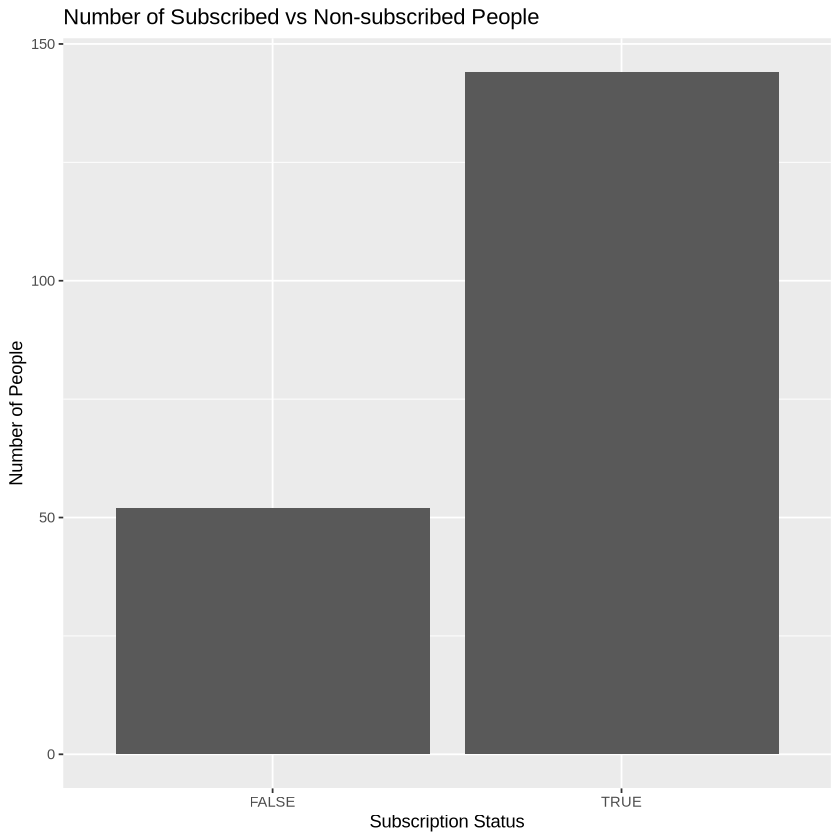

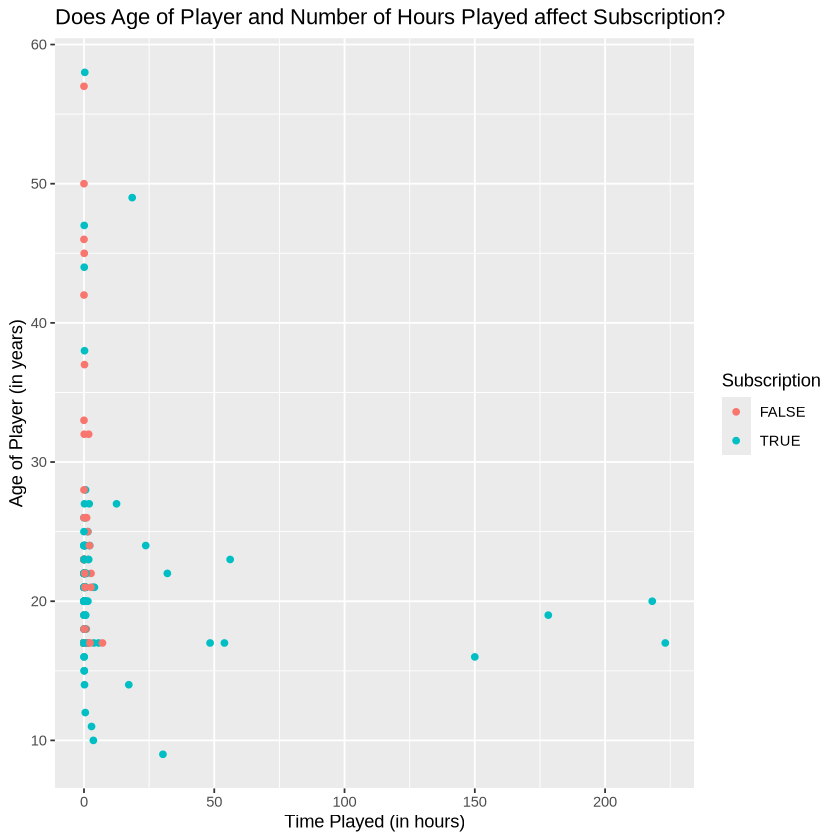

In [3]:
players_plot1<- players |>
    ggplot(aes(x = subscribe)) +
    geom_bar(stat = "count") +
    labs(x = "Subscription Status", y = "Number of People") +
    ggtitle("Number of Subscribed vs Non-subscribed People")
players_plot1

players_plot2<- players |>
    ggplot(aes(x = played_hours, y = Age, colour = subscribe)) +
    geom_point() +
    labs(x = "Time Played (in hours)", y = "Age of Player (in years)", colour = "Subscription")+
    ggtitle("Does Age of Player and Number of Hours Played affect Subscription?")
players_plot2

(4) Methods and Plan
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How are you going to compare and select the model?
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?

(4) I plan to use knn classification for this. This method is appropriate because there are two classes, either they are subscribed, or they are not. By graphing out the Age and hours_played variables, I will look for groups of the classes by color, which will help me predict with the nearest neighbours. 

I will split 0.7 of the data into a training and 0.3 to a testing set, then further perform 5-fold cross-validation on the training set to find the best k value. Using that k value, I will predict on the testing set.